# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random

%matplotlib inline


tf.reset_default_graph()
#Set random seed for reproducible results
tf.set_random_seed(42)

In [3]:
description = 'signnames.csv'

class_desc = pd.read_csv(description)
class_desc.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
np.savetxt("traffic-signs-data/ytrain.csv", y_train)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(34799,)


In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
def visualize_trainset():
    ### Visualisation of training set
    fig = plt.figure(figsize=(16,5))
    fig.suptitle('Examples of images from training set', fontsize=20)

    for i in range(1,16*5+1):
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()

        plt.subplot(5,16,i)
        plt.imshow(image)

    fig.savefig('output_images/training_set.jpg')

#uncomment below for generating the training images
#visualize_trainset()

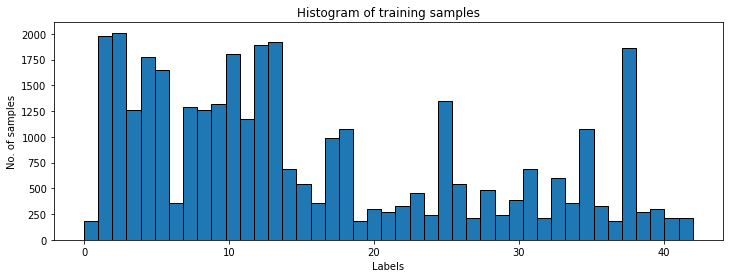

In [7]:
def histogram_training():
    # Histogram of the training samples. We could see that some of the classes have very few representations.
    fig = plt.figure(figsize=(12,4))
    n, bins, patches = plt.hist(y_train, n_classes, edgecolor='black')
    plt.xlabel('Labels')
    plt.ylabel('No. of samples')
    plt.title('Histogram of training samples')

histogram_training()

In [8]:
def visualize_each_label():
    somevalues = 43  #[8, 14, 19, 28]
    plt.rcParams.update({'figure.max_open_warning': 0})
    for val in range(somevalues):
        X_train_one_label = X_train[np.where(y_train==val)]
        desc = class_desc.loc[class_desc.ClassId==val]
        name = desc.SignName.values.item()
        length = len(X_train_one_label)

        ### Visualisation of training set
        fig = plt.figure(figsize=(5,1))
        fig.tight_layout()
        fig.suptitle('Examples of images from training set -- '+name +
                     '-- Sample Size --' + np.str(length) , fontsize=10)

        for i in range(1,6):
            index = random.randint(0, length-1)
            image = X_train_one_label[index].squeeze()

            plt.subplot(1,5,i)
            plt.imshow(image)

#uncomment if you want to visualize few of the training images for each label
#visualize_each_label()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
import cv2

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from skimage import exposure
from scipy import ndimage

In [10]:
def random_rotation(image):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-30, 30)
    rotate_img = sk.transform.rotate(image, random_degree)
    return rotate_img

def random_noise(image):
    # add random noise to the image
    random_noise_img= sk.util.random_noise(image, mode='gaussian')
    return random_noise_img

def rescale_intensity(image):
    
    v_min, v_max = np.percentile(image, (0.2, 99.8))
    better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
    return better_contrast
    
def horizontal_flip(image):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    horizontal_flip_img = image[:, ::-1]
    return horizontal_flip_img

def vertical_flip(image):
    # Vertical flip doesn't need skimage, it's easy as flipping the image array of pixels !
    vertical_flip_img = image[::-1, :]
    return vertical_flip_img

def blur_image(image):
    blured_image = ndimage.uniform_filter(image, size=(3, 3, 1))
    return blured_image

def scale_img(image):
    original_size = image.shape
    scale_out = sk.transform.rescale(image, scale=0.6, mode='reflect', multichannel=True, anti_aliasing=True)
    scaled_img = sk.transform.resize(scale_out, original_size, mode='reflect', anti_aliasing=True)
    return scaled_img
    
# dictionary of the transformations we defined above
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'rescale_intensity':rescale_intensity,
#    'horizontal_flip': horizontal_flip,
#    'vertical_flip': vertical_flip,
    'blur_image': blur_image,
    'scale_image': scale_img
}


In [11]:
####Testing of the transformations for each label
import re
plt.rcParams.update({'figure.max_open_warning': 0})
def testing_transformations():
    somevalues = 43
    for label in range(somevalues): 

        X_train_one_label = X_train[np.where(y_train==label)]
        desc = class_desc.loc[class_desc.ClassId==label]
        name = desc.SignName.values.item()
        length = len(X_train_one_label)

        writename = 'output_images/'+name+'-'+np.str(label)+'.jpg'
        writename=re.sub(r'[(|)|/|" "]',r'',writename)
        print(name+'-'+np.str(label)+'.jpg')        
        
        index = random.randint(0, length-1)
        image = X_train_one_label[index].squeeze()

        rotate = random_rotation(image)
        noise = random_noise(image)
        rescale = rescale_intensity(image)
        hor_flip = horizontal_flip(image)
        ver_flip = vertical_flip(image)
        blur = blur_image(image)
        scal = scale_img(image)
        
        f, axes = plt.subplots(1, 8, figsize=(20,10))
        ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axes.flatten()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(rotate)
        ax2.set_title('Rotate', fontsize=20)        
        ax3.imshow(noise)
        ax3.set_title('Noise', fontsize=20)
        ax4.imshow(rescale)
        ax4.set_title('Rescale Int', fontsize=20)        
        ax5.imshow(hor_flip)
        ax5.set_title('Hor Flip', fontsize=20)
        ax6.imshow(ver_flip)
        ax6.set_title('Vert Flip', fontsize=20)        
        ax7.imshow(blur)
        ax7.set_title('Blurred', fontsize=20)
        ax8.imshow(scal)
        ax8.set_title('Scaled', fontsize=20)        

        f.savefig(writename)
#uncomment for testing few samples of each transformed labels
#testing_transformations()

In [12]:

#this is for generating new transformed images 

def get_random_image_of_given_label(images_set, labels_set, label):
    image_indexes = np.where(labels_set == label)
    #print('image_indexes--', len(image_indexes[0]))
    rand_index = random.randint(0, np.bincount(labels_set)[label] - 1)
    #print('rand_index---',rand_index)
    return images_set[image_indexes][rand_index]

def transform_image(image):
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image)
    return transformed_image
    

def equalize_samples_set(X_set, y_set):

    labels_count_arr = np.bincount(y_set)
    labels_bins = np.arange(len(labels_count_arr))
    label_count_mean = int(np.mean(labels_count_arr)) * 4
    
    for label in range(len(labels_bins)):  
        labels_no_to_add =   label_count_mean - labels_count_arr[label]
        print('Label ----', label)
        X_temp = []
        y_temp = []

        for num in range(labels_no_to_add):      
            rand_image = get_random_image_of_given_label(X_set, y_set, label)
            X_temp.append(transform_image(rand_image))
            y_temp.append(label)            

        with open('traffic-signs-data/train-'+ np.str(label)+'.pkl', 'wb') as save_train:
            pickle.dump(np.array(X_temp), save_train, -1)
        with open('traffic-signs-data/label-'+ np.str(label) +'.pkl', 'wb') as save_label:
            pickle.dump(np.array(y_temp), save_label, -1)

    return X_set, y_set

# comment to be removed only for re-generation of pickle files
#equalize_samples_set(X_train, y_train)


In [13]:
training_file = 'traffic-signs-data/'
label_file='traffic-signs-data/'

labels_count_arr = np.bincount(y_train)
labels_bins = np.arange(len(labels_count_arr))
end = len(labels_bins)- 23
start = end

In [14]:
#To be applied only for data generation and dumping in pickle file
def generate_dump_files(X_train,y_train):

    for i in range(end):
        str_train = 'train-'+np.str(i)+'.pkl'
        print('str_train---', str_train)
        str_label = 'label-'+np.str(i)+'.pkl'
        with open(training_file+ str_train, mode='rb') as f:
            train_temp = pickle.load(f)
        with open(training_file+ str_label, mode='rb') as f:
            label_temp = pickle.load(f)

        X_train = np.append(X_train, train_temp, axis=0)
        y_train = np.append(y_train, label_temp, axis=0)


    print('X_train.shape---',X_train.shape)
    print('y_train.shape---', y_train.shape)

    with open('traffic-signs-data/train.pkl', 'wb') as save_train:
        pickle.dump(X_train, save_train, -1)
    with open('traffic-signs-data/label.pkl', 'wb') as save_label:
        pickle.dump(y_train, save_label, -1)
        
# to be uncommented only during generation of pickle files
#generate_dump_files(X_train,y_train)


In [15]:
X_temp = np.empty([1,32,32,3])
y_temp = np.empty([1])

def generate_dump_files_contd():
    # get the saved Xtrain and Xlabel and start with the remaining merge
    for i in range(len(labels_bins)-end):
        str_train = 'train-'+np.str(i+end)+'.pkl'
        print('str_train---', str_train)
        str_label = 'label-'+np.str(i+end)+'.pkl'
        with open(training_file+ str_train, mode='rb') as f:
            train_temp = pickle.load(f)
        with open(training_file+ str_label, mode='rb') as f:
            label_temp = pickle.load(f)
        if i == 0:
            X_temp =train_temp
            y_temp =label_temp
        else:
            X_temp = np.append(X_temp, train_temp, axis=0)
            y_temp = np.append(y_temp, label_temp, axis=0)

    print('X_temp.shape---',X_temp.shape)
    print('y_temp.shape---', y_temp.shape)

    with open('traffic-signs-data/train1.pkl', 'wb') as save_train:
        pickle.dump(X_temp, save_train, -1)
    with open('traffic-signs-data/label1.pkl', 'wb') as save_label:
        pickle.dump(y_temp, save_label, -1)

        
#to be uncommented only when need to generate the next batch of pickle files
#generate_dump_files_contd()

In [16]:
def merge_two_pickle_dumps():

    # merge both the pickle dumps to get train and label data
    X_train_T= np.empty([1,32,32,3])
    y_train_T = np.empty([1])


    with open('traffic-signs-data/train.pkl', mode='rb') as f:
        X_train_T = pickle.load(f)
    with open('traffic-signs-data/label.pkl', mode='rb') as f:
        y_train_T = pickle.load(f)

    with open('traffic-signs-data/train1.pkl', mode='rb') as f:
        X_temp_T = pickle.load(f)
    with open('traffic-signs-data/label1.pkl', mode='rb') as f:
        y_temp_T = pickle.load(f)

    X_train_T = np.append(X_train_T , X_temp_T , axis= 0)
    y_train_T = np.append(y_train_T , y_temp_T , axis= 0)

    print('X_train_T.shape---', X_train_T.shape)
    print('y_train_T.shape---', y_train_T.shape)
    
    return X_train_T, y_train_T

#uncomment if you want to load the total training sample
#X_train_T, y_train_T = merge_two_pickle_dumps()

X_train_T.shape--- (139148, 32, 32, 3)
y_train_T.shape--- (139148,)


In [17]:

#SAve the full transformed training samples 
def save_full_training():
    with open('traffic-signs-data/train_T.pkl', 'wb') as save_train:
        pickle.dump(X_train_T, save_train, -1)
    with open('traffic-signs-data/label_T.pkl', 'wb') as save_label:
        pickle.dump(y_train_T, save_label, -1)

    print('X_train_T.shape---', X_train_T.shape)
    print('y_train_T.shape---', y_train_T.shape)

#uncomment if you need to save the full training samples
#save_full_training()

X_train_T.shape--- (139148, 32, 32, 3)
y_train_T.shape--- (139148,)


In [ ]:
#LOad the full training samples from pickle
with open('traffic-signs-data/train_T.pkl', mode='rb') as f:
    X_temp_T = pickle.load(f)
with open('traffic-signs-data/label_T.pkl', mode='rb') as f:
    y_temp_T = pickle.load(f)

print('X_train_T.shape---', X_train_T.shape)
print('y_train_T.shape---', y_train_T.shape)

In [20]:

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#histogram equalization is a method that adjusts image intensities 
#in order to enhance the contrast of the image. This is a type of global contrast enhancement
# It is straightforward to apply this function on a grayscale image 
#as the method actually equalizes the histogram of a grayscale image
def grayscale(img): 
    img = img.astype('uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return gray

def normalize(value):
#    m=np.mean(value)
#    maxv = np.max(value)
#    minv = np.min(value)
#    diff= maxv-minv
    nm=0
    with np.errstate(divide='ignore',invalid='ignore'):
        nm = np.array(value /255.0 - 0.5)
    return nm

def hist_equilize(image):
    hist_equalization_result = cv2.equalizeHist(image)
    return hist_equalization_result


def preprocess_image(image):
    #print('image.shape-befor--',image.shape)
    #print('np.argmax(image[1])--',np.argmax(image[1]))
    img = grayscale(image)
    #print('np.argmax(img[1])---gray--',np.argmax(img[1]))
    img = hist_equilize(img)
    img = normalize(img)
    #print('after normalize--',img)
    #print('max-',np.max(img))
    #print('min-', np.min(img))
    img = np.reshape(img, [img.shape[0],img.shape[1], 1])
    return img

def preprocess_batch(images):
    imgs = np.zeros(shape=[images.shape[0],images.shape[1],images.shape[2],1])
    #print(imgs.shape)
    for i in range(images.shape[0]):
        imgs[i] = preprocess_image(images[i])  
    return imgs


#image = preprocess_image(X_train[0])


In [21]:

X_train_processed = preprocess_batch(X_train_T)
print('X_train_processed[0].shape----',X_train_processed.shape)
X_valid_processed = preprocess_batch(X_valid)
X_test_processed = preprocess_batch(X_test)



X_train_processed[0].shape---- (139148, 32, 32, 1)


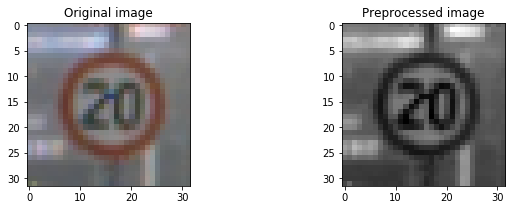

In [22]:
no_test_image = 10000

sample_image = X_train_T[no_test_image]
sample_image_processed = grayscale(X_train_T[no_test_image])
fig=plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original image")
plt.imshow(sample_image.astype('uint8'))
sub=plt.subplot(132)
sub.set_title("Preprocessed image")
plt.imshow(sample_image_processed.squeeze(), cmap='gray')



### Model Architecture

In [54]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 1200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # Drop out
    fc1 = tf.nn.dropout(fc1, keep_prob=0.5)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 1200. Output = 800.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1200, 800), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(800))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # Drop out
    fc2 = tf.nn.dropout(fc2, keep_prob=0.5)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


In [55]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [53]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

varss= tf.trainable_variables()
print(varss)
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in varss
                      if '_b' not in v.name ]) * 0.001

print(lossL2)

[<tf.Variable 'Variable:0' shape=(5, 5, 1, 6) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(6,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 6, 16) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(400, 120) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(120,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(120, 84) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(84,) dtype=float32_ref>, <tf.Variable 'Variable_8:0' shape=(84, 43) dtype=float32_ref>, <tf.Variable 'Variable_9:0' shape=(43,) dtype=float32_ref>]
Tensor("mul:0", shape=(), dtype=float32)


In [39]:
#Learning rate
starting_learning_rate = 0.03
#Decay steps 
decay_steps = 10000 
#Decay rate - should be less than 1
decay_rate = 0.96

#Capture current step
current_step = tf.Variable(0, trainable=False)

#Exponential decay rate
#Formula for decay = 
#starting_learning_rate * decay_rate^(current_step/decay_steps)
learn_rate = tf.train.exponential_decay(starting_learning_rate, 
                                        current_step,
                                        decay_steps, 
                                        decay_rate)    

In [56]:
rate = 0.001

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)

In [57]:
EPOCHS = 200
BATCH_SIZE = 128

In [58]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [59]:
from sklearn.utils import shuffle
cost_arr=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):
        xtrain, ytrain = shuffle(X_train_processed, y_train_T)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xtrain[offset:end], ytrain[offset:end]
            _,cost=sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y})
            
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        #print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("EPOCH; {}; Valid.Acc.; {:.3f}; Loss; {:.5f}".format(i+1, validation_accuracy, cost))
        cost_arr.append(cost)
        #print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training... 139148

EPOCH; 1; Valid.Acc.; 0.910; Loss; 0.85714
EPOCH; 2; Valid.Acc.; 0.929; Loss; 1.43236
EPOCH; 3; Valid.Acc.; 0.937; Loss; 1.66958
EPOCH; 4; Valid.Acc.; 0.946; Loss; 1.20157
EPOCH; 5; Valid.Acc.; 0.947; Loss; 1.49535
EPOCH; 6; Valid.Acc.; 0.947; Loss; 1.50552
EPOCH; 7; Valid.Acc.; 0.949; Loss; 0.77287
EPOCH; 8; Valid.Acc.; 0.951; Loss; 1.43498
EPOCH; 9; Valid.Acc.; 0.948; Loss; 1.89379
EPOCH; 10; Valid.Acc.; 0.959; Loss; 0.62512
EPOCH; 11; Valid.Acc.; 0.944; Loss; 1.41154
EPOCH; 12; Valid.Acc.; 0.949; Loss; 1.56341
EPOCH; 13; Valid.Acc.; 0.951; Loss; 1.84630
EPOCH; 14; Valid.Acc.; 0.945; Loss; 1.21805


KeyboardInterrupt: 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [60]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
plt.plot(cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

INFO:tensorflow:Restoring parameters from .\lenet


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [5,5,1,32] rhs shape= [5,5,1,6]
	 [[node save/Assign (defined at <ipython-input-58-c5da69dcb222>:3)  = Assign[T=DT_FLOAT, _class=["loc:@Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable, save/RestoreV2)]]

Caused by op 'save/Assign', defined at:
  File "C:\Users\Dell\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Dell\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Dell\Anaconda3\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "C:\Users\Dell\Anaconda3\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "C:\Users\Dell\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-c5da69dcb222>", line 3, in <module>
    saver = tf.train.Saver()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1102, in __init__
    self.build()
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1114, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1151, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 795, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 428, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 119, in restore
    self.op.get_shape().is_fully_defined())
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 221, in assign
    validate_shape=validate_shape)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 61, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [5,5,1,32] rhs shape= [5,5,1,6]
	 [[node save/Assign (defined at <ipython-input-58-c5da69dcb222>:3)  = Assign[T=DT_FLOAT, _class=["loc:@Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable, save/RestoreV2)]]


### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")